# Table of Contents
 <p><div class="lev1"><a href="#Select-the-Wave-Curve"><span class="toc-item-num">1&nbsp;&nbsp;</span>Select the Wave Curve</a></div><div class="lev2"><a href="#Threshold-Method"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Threshold Method</a></div>

# Select the Wave Curve

In [1]:
from matplotlib import pyplot as plt
from collections import defaultdict

import matplotlib
import numpy as np
import pandas as pd
import peakutils
import sys

In [2]:
# local
sys.path.insert(0, '../')
from pywim.utils.dsp.synthetic_data.sensor_data import gen_analog_data
from pywim.utils.dsp.baseline import cbf

In [3]:
plt.style.use('ggplot')
%matplotlib notebook
"""
plt.grid(True)
plt.legend(True)
plt.xticks(rotation=45)
plt.tight_layout()
"""
None

In [4]:
data = gen_analog_data(
    sample_rate=5000, speed=15.0, vehicle_layout='-o-o---o---o-', 
    sensors_distance=[2],
    p_signal_noise=10
)

<IPython.core.display.Javascript object>


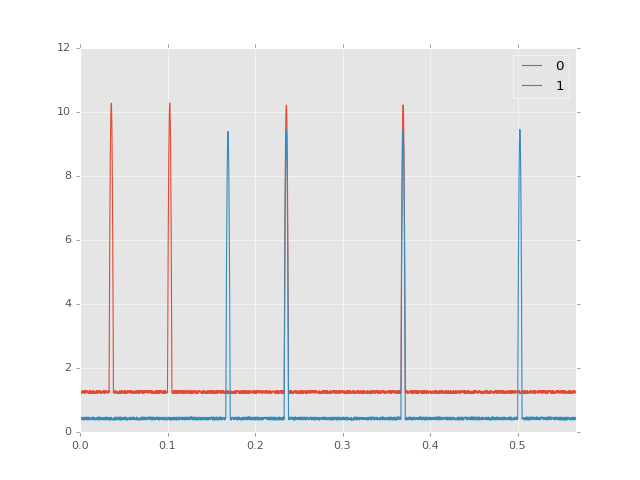

In [5]:
ax = plt.figure().gca()
data.plot(ax=ax)
plt.show()

## Threshold Method 

<IPython.core.display.Javascript object>


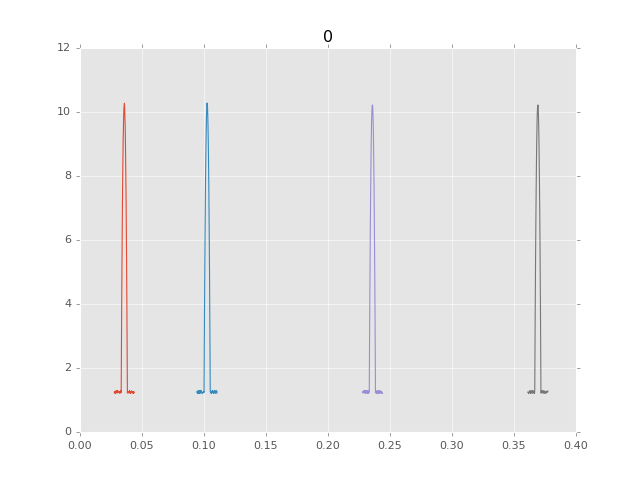

<IPython.core.display.Javascript object>


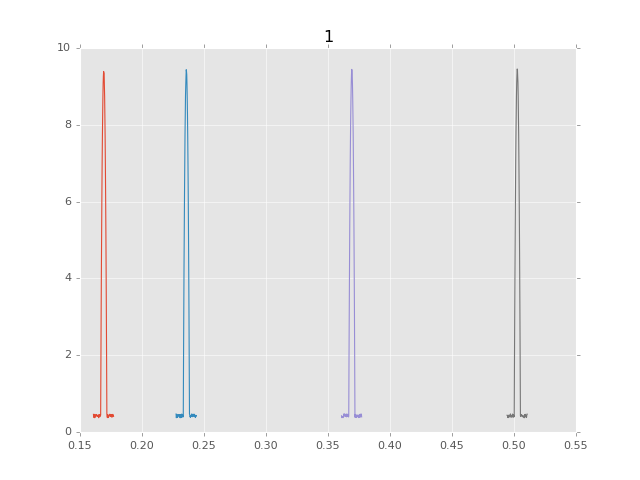

In [6]:
def select_curve_by_threshold(
    signal_data: pd.Series,
    threshold: float, Δx: int
):
    """
    
    """
    indexes = peakutils.indexes(signal_data, thres=0.5, min_dist=30)
    curves = []
    
    for ind_axle in indexes:
        i_start = ind_axle - Δx
        i_end = ind_axle + Δx
        
        p_start = Δx
        while i_start >= p_start:
            i_start -= 1
            if data[k].iloc[i_start] <= threshold:
                break
        
        p_end = signal_data.size - Δx
        while i_end <= p_end:
            i_end += 1
            if data[k].iloc[i_end] <= threshold:
                break
        curves.append(data[k].iloc[i_start-Δx:i_end+Δx])

    return curves

threshold = 2
curves = defaultdict(list)

for k in data.keys():
    y = cbf(data[k].values)
    curves[k] = select_curve_by_threshold(
        signal_data=y, threshold=threshold, Δx=20
    )
    
for k in curves.keys():
    plt.figure()
    for i_curve, v_curve in enumerate(curves[k]):
        plt.plot(v_curve, label=i_curve)
    plt.title('%s' % k)
    plt.show()